[Problem 1] Data visualization Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("mtfuji_data.csv")
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


<function matplotlib.pyplot.show(close=None, block=None)>

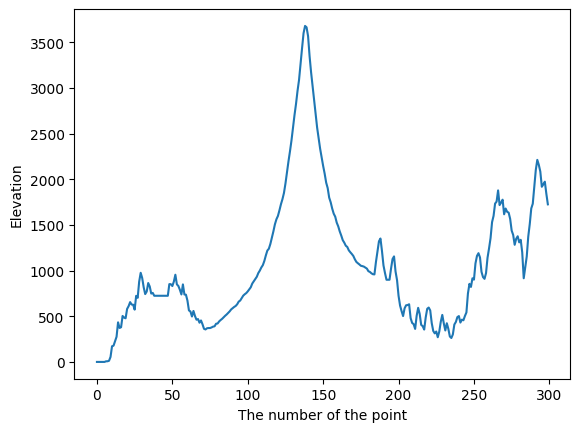

In [3]:
import matplotlib.pyplot as plt
x = df.loc[:,["x"]]
y = df.loc[:,["elevation"]]

plt.plot(x,y)
plt.xlabel("The number of the point")
plt.ylabel("Elevation")
plt.show

In [4]:
elevation = fuji[:,3]
position = fuji[:,0]

[Problem 2] Create a function to calculate the gradient at a certain point In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

In [5]:
def compute_gradient(y, x,current_point):
  amount_of_change_in_y = y[1:] - y[:-1]
  amount_of_change_in_x = x[1:] - x[:-1]
  Grad = amount_of_change_in_y/amount_of_change_in_x
  return Grad[current_point-1]


[Problem 3] Create a function to calculate the destination point Create a function that calculates the next point to move to based on the information on the slope of the current point.

In [6]:
def compute_destination_point(current_point, current_point_gradient, learning_rate = 0.2):
  destination_point = current_point - learning_rate * current_point_gradient
  return destination_point

[Problem 4] Create a function to go down the mountain Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

[Problem 5] Visualization of the descent process Visualize the descending process in Problem 4 with a graph using Matplotlib.

22.370000000000005
25.57000000000005
13.370000000000005
17.100000000000023
16.579999999999984
2.1899999999999977
28.27000000000004
13.230000000000018
-41.94
3.5
[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78]


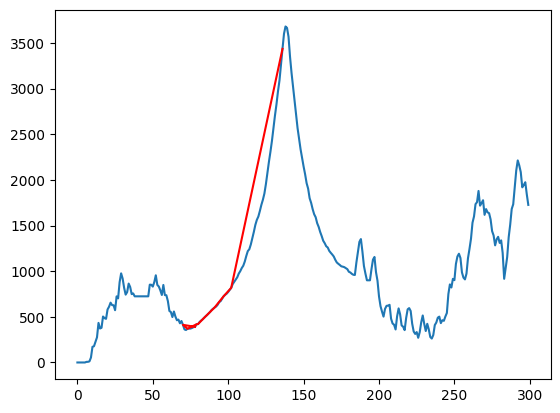

In [7]:
from numpy.lib.function_base import gradient
def compute_path(elevation, current_pos, position,max_iter, learning_rate = 0.2):
  path.append(current_pos)
  
  grad = compute_gradient(elevation,position,current_pos)
  grad_first = grad
  grad_previos =grad
  i=0
  path_index.append(i)
  while (max_iter>i): 
    destination_point = int(compute_destination_point(current_pos,learning_rate,grad))
    path.append(destination_point)
    current_pos = destination_point
    i +=1
    path_index.append(i)
    grad_previos =grad
    grad = compute_gradient(elevation,position,current_pos)
    print(grad)
  return path, path_index
path = []
path_index = []
current_location = 136
learning_rate = 0.2
max_iter = 10

path, path_index = compute_path(elevation, current_location, position,max_iter,learning_rate)
print(path)
plt.plot(position,elevation)
plt.plot(path,elevation[path],color='red')

[Problem 6] Change of initial value In Question 4, we fixed the first "where we are" to 136, but calculate this at all other points. Specifically, it means being able to change the "current location".

[Problem 7] Visualization of the descent process for each initial value In Problem 6, we calculated the descending process of all initial values. Therefore, please visualize what kind of descent process will be for some initial values as in Problem 5. It can be confirmed that the initial value affects the result in the gradient descent method.

94.59999999999991
53.34000000000003
-60.47000000000003
53.34000000000003
-60.47000000000003
53.34000000000003
-60.47000000000003
53.34000000000003
-60.47000000000003
53.34000000000003
[260, 249, 239, 233, 239, 233, 239, 233, 239, 233, 239]


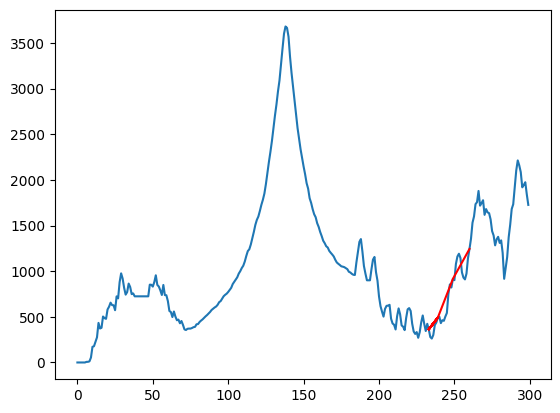

In [8]:
from numpy.lib.function_base import gradient
def compute_path(elevation, current_pos, position,max_iter, learning_rate = 0.2):
  path.append(current_pos)
  
  grad = compute_gradient(elevation,position,current_pos)
  grad_first = grad
  grad_previos =grad
  i=0
  path_index.append(i)
  while (max_iter>i): 
    destination_point = int(compute_destination_point(current_pos,learning_rate,grad))
    path.append(destination_point)
    current_pos = destination_point
    i +=1
    path_index.append(i)
    grad_previos =grad
    grad = compute_gradient(elevation,position,current_pos)
    print(grad)
  return path, path_index
path = []
path_index = []
current_location = 260
learning_rate = 0.1
max_iter = 10

path, path_index = compute_path(elevation, current_location, position,max_iter,learning_rate)
print(path)
plt.plot(position,elevation)
plt.plot(path,elevation[path],color='red')